In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [10]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-07-04 12:19:46--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-07-04 12:19:46 (37.6 MB/s) - ‘insurance.csv.2’ saved [50264/50264]

['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
# 1. Data Preprocessing

# Convert categorical data to numbers
dataset['sex'] = dataset['sex'].map({'female': 0, 'male': 1})
dataset['smoker'] = dataset['smoker'].map({'no': 0, 'yes': 1})
dataset['region'] = dataset['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})


# Normalize numerical data
numeric_columns = ['age', 'bmi', 'children']
dataset[numeric_columns] = (dataset[numeric_columns] - dataset[numeric_columns].mean()) / dataset[numeric_columns].std()

# 2. Splitting the data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

# Convert to float32
train_dataset = train_dataset.astype('float32')
test_dataset = test_dataset.astype('float32')
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

# 3. Creating and training the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

model = build_model()

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    train_dataset, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()])

# 4. Evaluating the model
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
print("\nTesting set Mean Abs Error: {:5.2f} expenses".format(mae))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

9/9 - 0s - loss: 30226300.0000 - mae: 3028.3452 - mse: 30226300.0000 - 31ms/epoch - 3ms/step
Testing set Mean Abs Error: 3028.35 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


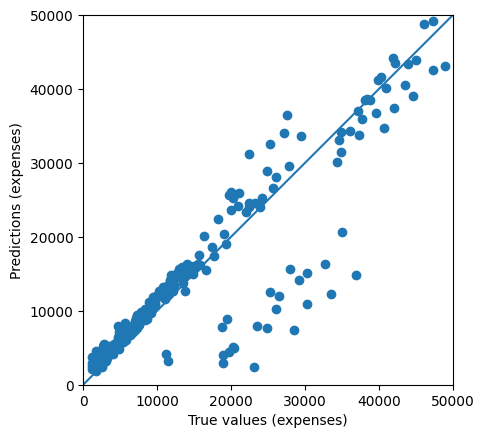

In [12]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
